In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../data/processed/cleanedOnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 1. Total sales over time

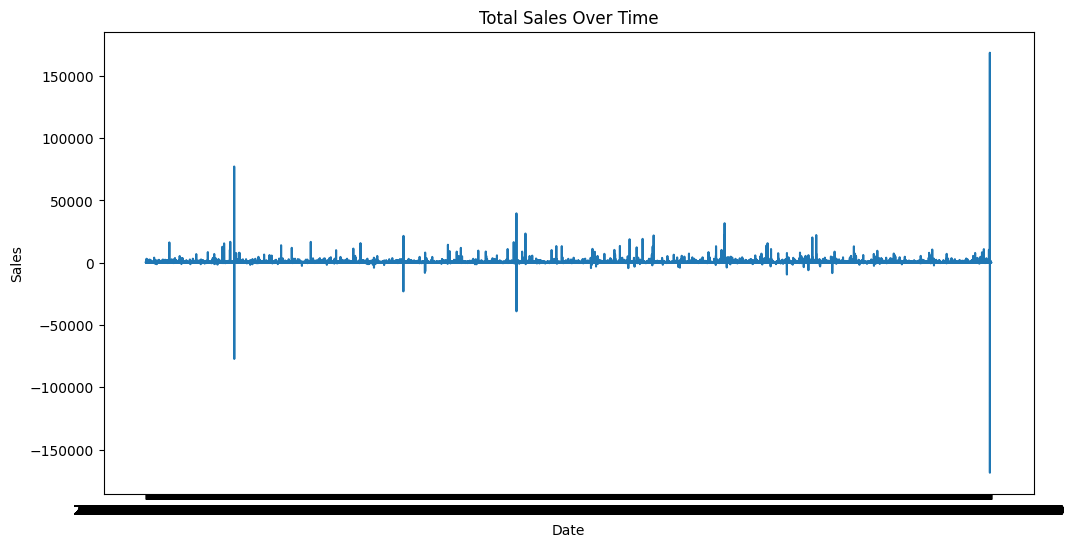

In [18]:
daily_sales = df.groupby('InvoiceDate')['TotalPrice'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x = daily_sales.index, y = daily_sales.values)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.savefig('../images/daily_sales.png')
plt.show()

Insights: Certain months have peak sales → plan inventory & marketing campaigns.

### 2. Top 10 products by sales

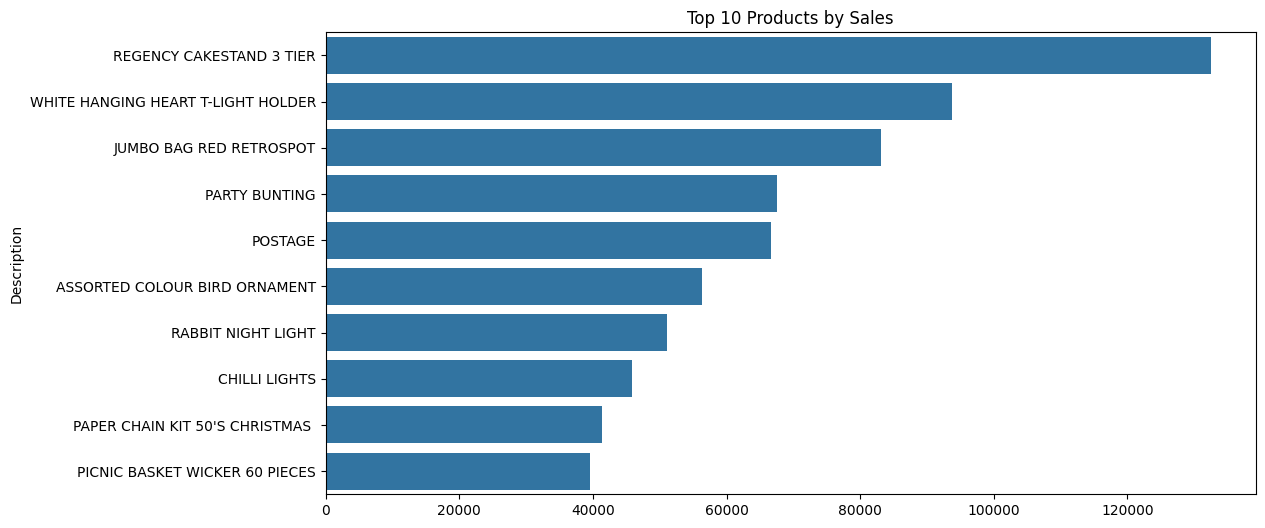

In [24]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x = top_products.values, y = top_products.index)
plt.title('Top 10 Products by Sales')
plt.savefig('../images/top_products.png')
plt.show()

Insight: Top 10 products generate majority of revenue. Focus on promoting them.

### 3. Customer purchase frequency

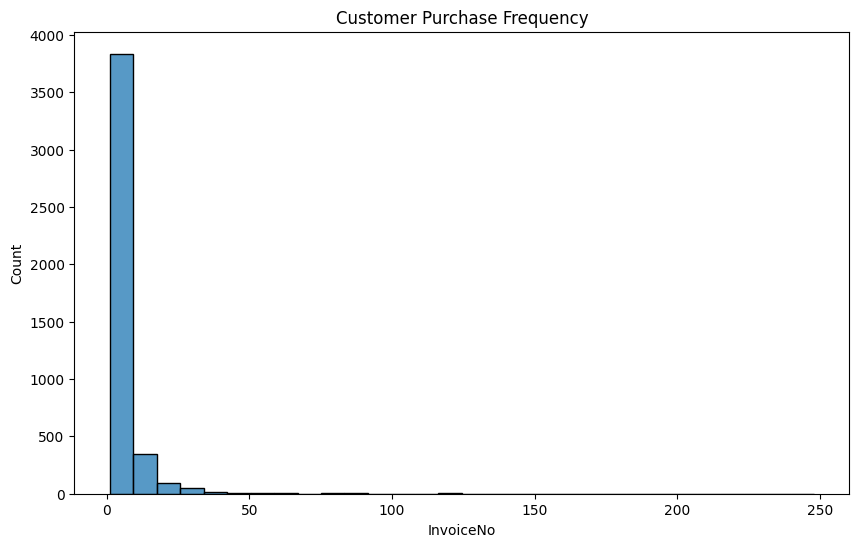

In [25]:
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10,6))
sns.histplot(customer_freq, bins=30)
plt.title('Customer Purchase Frequency')
plt.savefig('../images/customer_freq.png')
plt.show()